# Main goal is to make a predictive model which will take iq and cgpa as inputs and gives if that student is able to get a placement or not based on its new iq and cgpa input.
## Steps:
1. Preprocessing + EDA + Feature Selection
2. Extracting input and output columns
3. Scaling the values
4. Train test split
5. Training the model
6. Evaluating the model/model selection
7. Deploying the model

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape
# 100 rows and 4 columns

(100, 4)

In [5]:
# We need to remove the 'Unnamed' column as it is not required as our inputs

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
# Here we can see there are no missing values.
# But we need to remove that 'unnamed' column
df = df.iloc[:,1:] # This means we need all rows and columns starting from 1st location

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# Here we can see 'unnamed' is removed
# So preprocessingstep is over

## EDA

In [10]:
import matplotlib.pyplot as plt

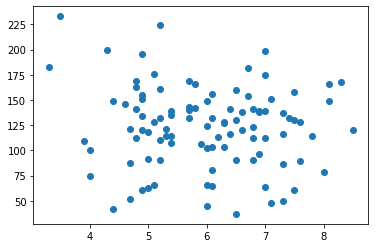

In [11]:
plt.scatter(df['cgpa'], df['iq']) # X-axis = cgpa and Y-axis = iq

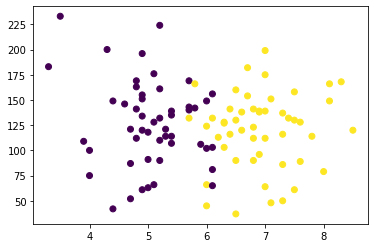

In [12]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement']) # Giving a color to students who got placements

In [13]:
# Here we can see afer performing EDA, we can linearly separate our classes i.e placements and no placements
# By using Logistic Regression algorithm

## Extracting and Input and Output columns
- inputs are independent variables and outputs are dependent variable

In [14]:
# Independent variables
X = df.iloc[:,0:2] # all rows with columns no. 0 and 1 means iq and cgpa
# Dependent variable
Y = df.iloc[:,-1] # Last column

In [15]:
X # 2D Tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
Y # 1D Tensor

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

## Train-Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split(X, Y, test_size = 0.1) # 10% of my data rows will go into test sets and rest to training sets

[    cgpa     iq
 95   4.3  200.0
 76   4.9  155.0
 30   7.6  128.0
 89   4.9  151.0
 70   6.3  127.0
 ..   ...    ...
 1    5.9  106.0
 93   6.8  112.0
 4    5.8  142.0
 13   6.4  116.0
 80   4.9  196.0
 
 [90 rows x 2 columns],     cgpa     iq
 91   7.5  158.0
 27   6.0  124.0
 94   4.7   52.0
 9    5.1   66.0
 46   5.3  114.0
 51   4.8  141.0
 63   6.3  128.0
 96   4.4   42.0
 34   4.8  163.0
 12   5.4  139.0, 95    0
 76    0
 30    1
 89    0
 70    1
      ..
 1     0
 93    1
 4     0
 13    1
 80    0
 Name: placement, Length: 90, dtype: int64, 91    1
 27    1
 94    0
 9     0
 46    0
 51    0
 63    1
 96    0
 34    0
 12    0
 Name: placement, dtype: int64]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [20]:
X_train

,cgpa,iq
51,4.8,141.0
53,8.3,168.0
4,5.8,142.0
44,7.5,61.0
30,7.6,128.0
...,...,...
87,5.7,132.0
48,6.6,138.0
22,4.9,120.0
95,4.3,200.0


In [21]:
X_test

,cgpa,iq
43,6.8,141.0
36,5.7,140.0
91,7.5,158.0
85,5.8,166.0
13,6.4,116.0
34,4.8,163.0
15,5.1,176.0
47,5.2,161.0
3,7.4,132.0
96,4.4,42.0


In [22]:
Y_train

51    0
53    1
4     0
44    1
30    1
     ..
87    1
48    1
22    0
95    0
19    0
Name: placement, Length: 90, dtype: int64

In [23]:
Y_test

43    1
36    0
91    1
85    1
13    1
34    0
15    0
47    0
3     1
96    0
Name: placement, dtype: int64

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train
# All the values are in between -1 to 1 for better operating 

array([[-1.04402662,  0.48371287],
       [ 2.00105103,  1.16432798],
       [-0.17400444,  0.50892084],
       [ 1.30503328, -1.53292447],
       [ 1.3920355 ,  0.15600931],
       [ 0.        , -1.93625194],
       [-1.74004437, -1.18001293],
       [ 1.74004437, -1.07918107],
       [ 0.87002219, -1.45730057],
       [-0.78301997,  0.15600931],
       [ 1.13102884, -0.1464863 ],
       [-2.3490599 ,  1.54244748],
       [ 0.26100666,  0.15600931],
       [ 0.        , -1.40688464],
       [ 0.78301997,  0.43329694],
       [ 0.08700222, -0.47418986],
       [-0.69601775,  2.57597412],
       [ 1.56603993, -0.19690223],
       [ 0.9570244 , -1.86062804],
       [-0.9570244 ,  0.30725711],
       [-0.87002219, -0.09607036],
       [ 1.13102884,  0.38288101],
       [-0.9570244 ,  0.83662441],
       [ 0.        ,  0.68537661],
       [-0.52201331, -0.19690223],
       [ 0.08700222,  0.25684117],
       [-0.52201331,  0.43329694],
       [-1.82704659, -0.32294206],
       [ 0.43501109,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.69601775,  0.48371287],
       [-0.26100666,  0.45850491],
       [ 1.30503328,  0.91224831],
       [-0.17400444,  1.11391204],
       [ 0.34800887, -0.1464863 ],
       [-1.04402662,  1.03828814],
       [-0.78301997,  1.36599171],
       [-0.69601775,  0.98787221],
       [ 1.21803106,  0.25684117],
       [-1.3920355 , -2.01187584]])

## Training the Model using Logistic Regression Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression() # clf = classifier

In [32]:
# Model Training
clf.fit(X_train, Y_train) # fit() is used to train the data
# As this is a very small dataset less no. of code lines are required for model training

LogisticRegression()

## Evaluating the model

In [33]:
clf.predict(X_test)
# This is our model prediction

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [34]:
Y_test
# This is the actual hidden data of those 10 students who has got placement or not

43    1
36    0
91    1
85    1
13    1
34    0
15    0
47    0
3     1
96    0
Name: placement, dtype: int64

In [35]:
# We can see by comparing our actual test data and model's predicted data 
# We can observe that every prediction of our model is not correct

In [36]:
Y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# For calculating the model accuracy internally by using this function
accuracy_score(Y_test, Y_pred)

0.9

In [39]:
# Here we can see our model's accuracy is 90%

## Checking the decision boundary and hidden patterns our model has concluded

In [40]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


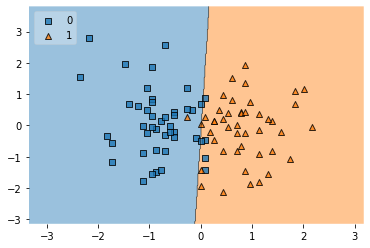

In [44]:
clf.fit(X_train, Y_train)
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2) # .values means converting into numpy array


In [45]:
import pickle # pickle will convert every object in python to a file followed by using it any enviroment.

In [46]:
pickle.dump(clf,open('model.pkl','wb'))